# Лінійна регресія: перенавчання та регуляризація

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import scale
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

# Завдання 1

In [2]:
df = pd.read_csv('bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


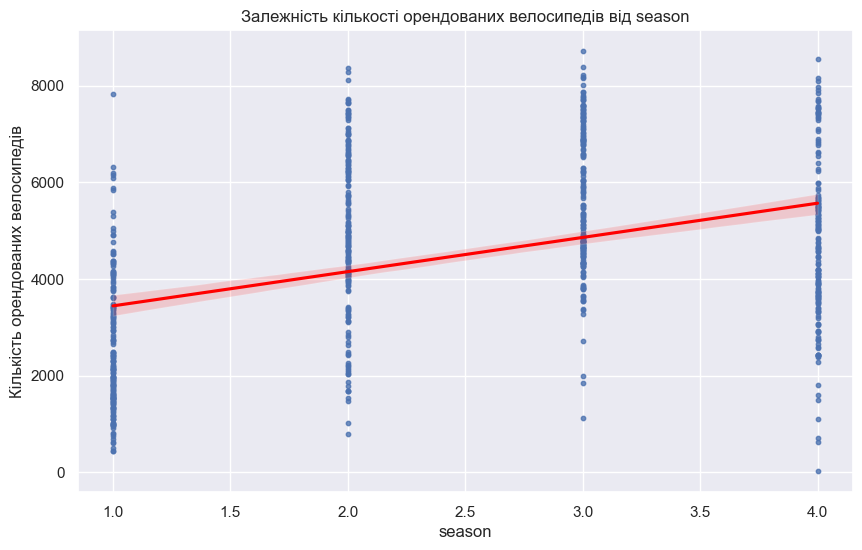

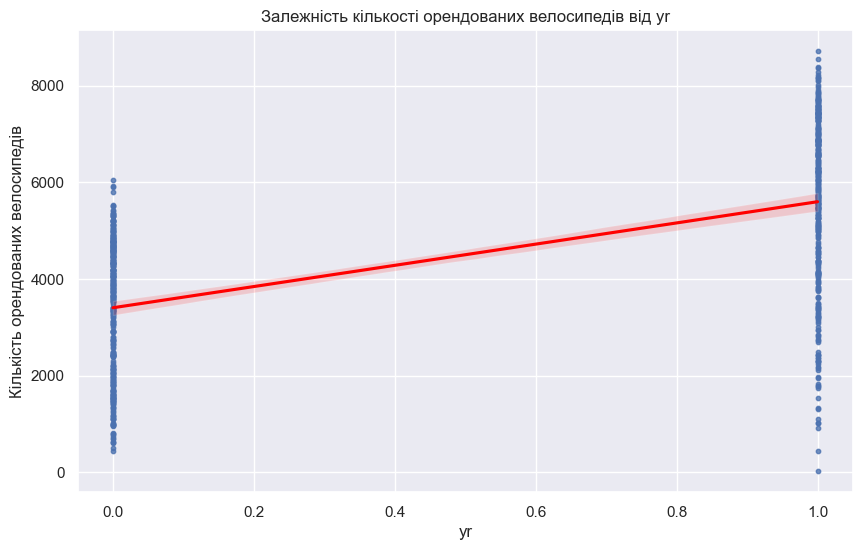

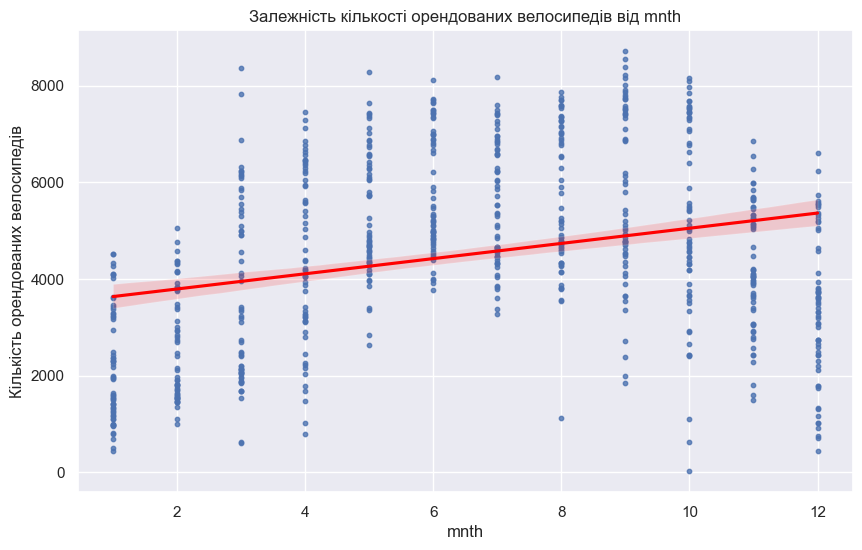

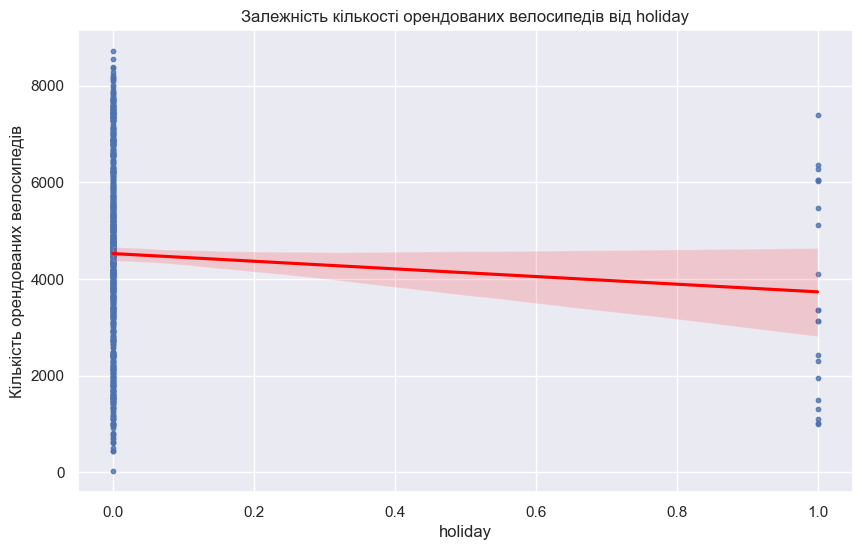

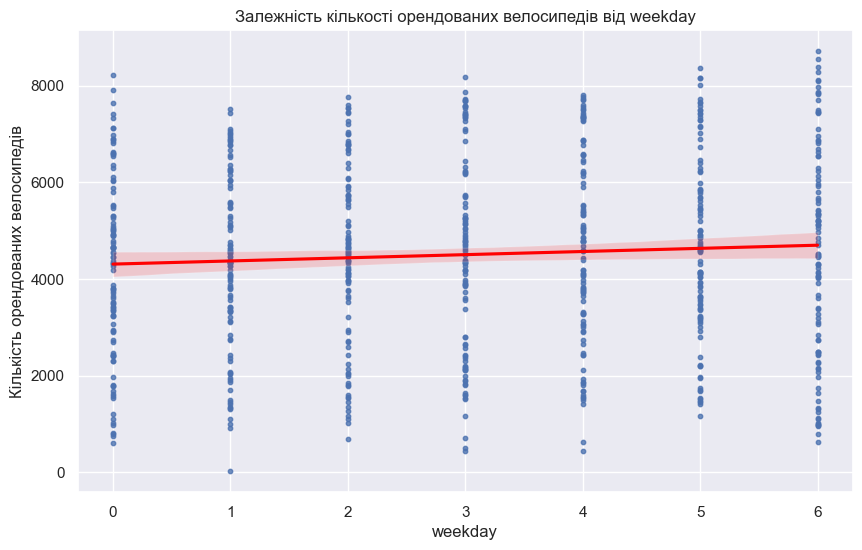

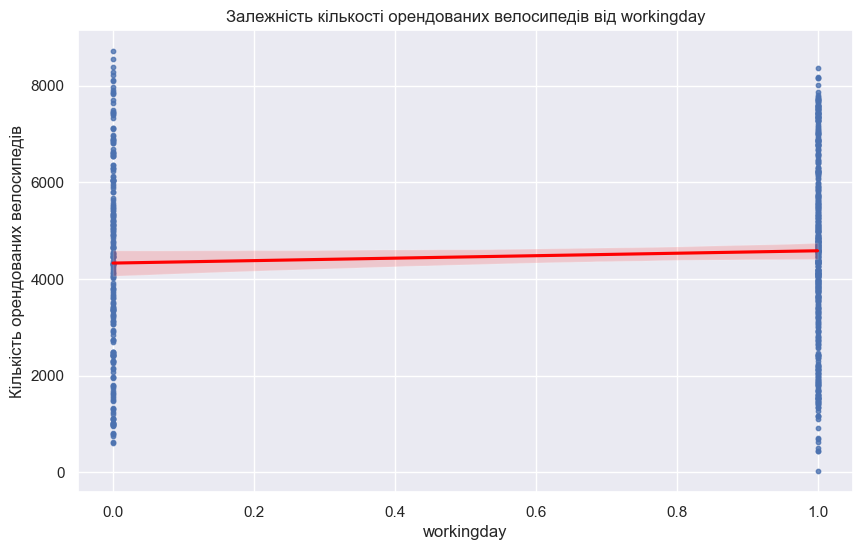

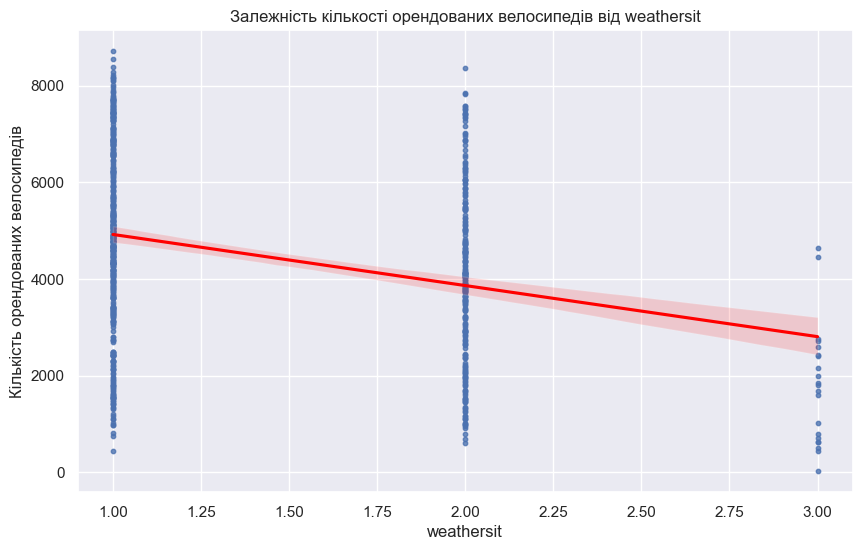

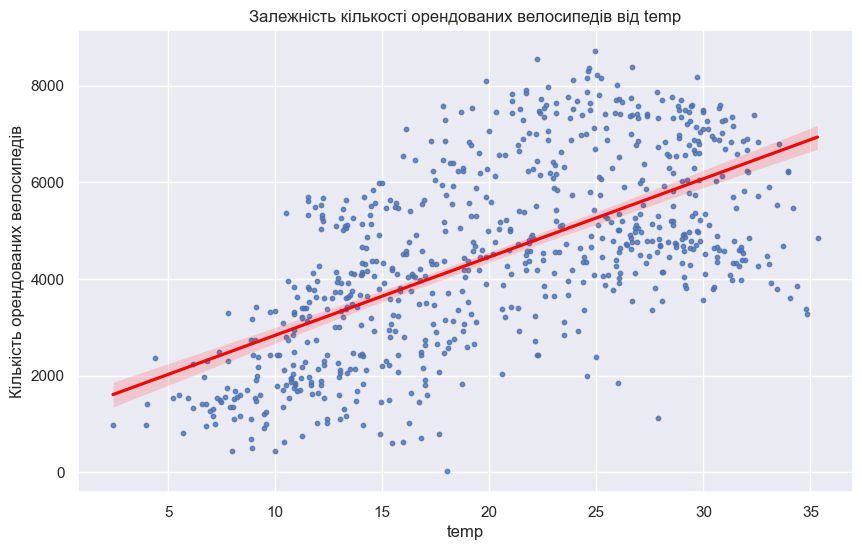

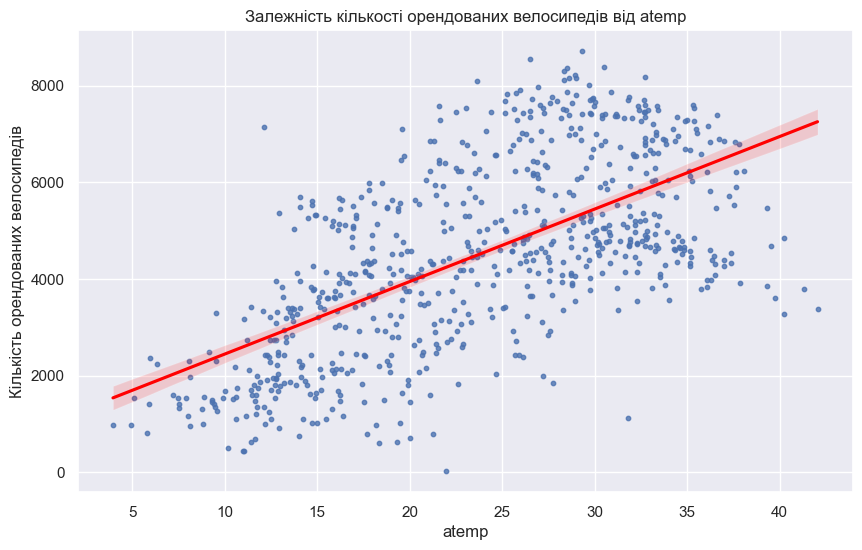

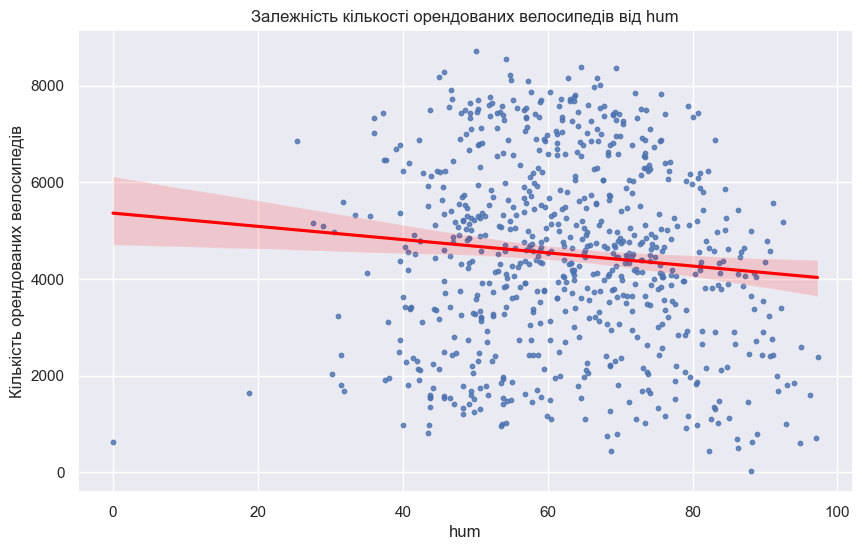

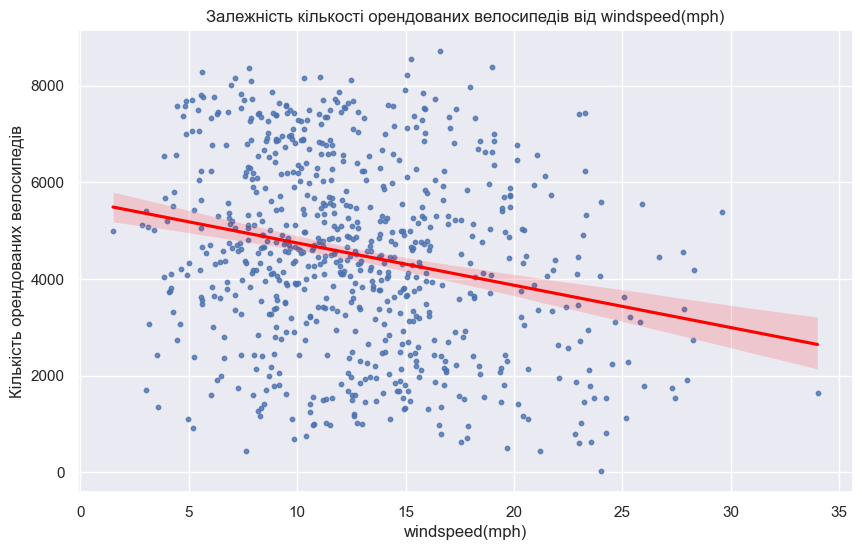

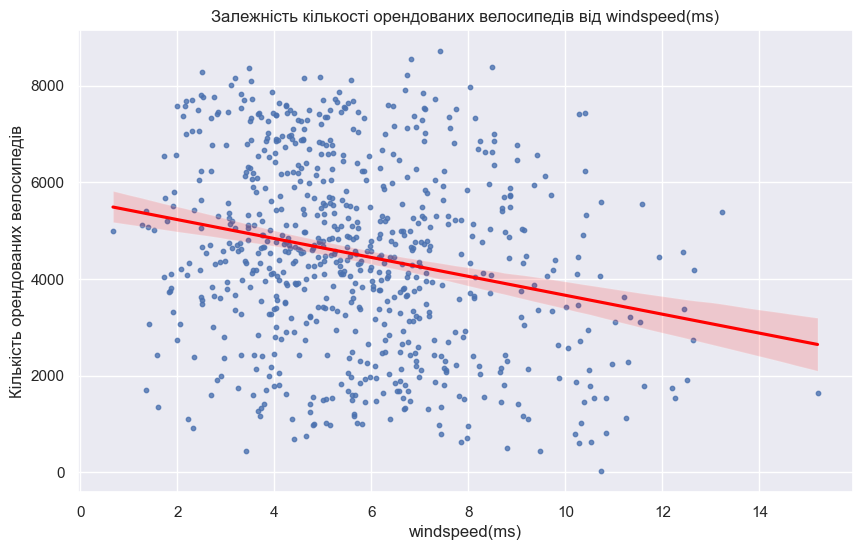

In [64]:
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

sns.set(style="darkgrid")

for attr in attributes:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=attr, y='cnt', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f"Залежність кількості орендованих велосипедів від {attr}")
    plt.xlabel(attr)
    plt.ylabel('Кількість орендованих велосипедів')
    plt.show()

## Відповіді:
    1. У теплих місяцях з 5 по 9 спостерігається найвища кількість орендованих велосипедів, на відміну від більш прохолодних місяців.
    2. Ознаки, від яких, ймовірно, кількість прокатів залежить лінійно: кількість років (yr), робочі дні (workingday) та температура повітря (temp).

# Завдання 2

In [4]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


# Завдання 3

In [13]:
features = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
features.corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


# Завдання 4

In [14]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [15]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

# Завдання 5

In [16]:
regressor = LinearRegression()

regressor.fit(X, y)

feature_weights = zip(df.columns[:-1], regressor.coef_)

for feature, weight in feature_weights:
    print(f"{feature}: {weight}")

season: 570.869595873149
yr: 1021.9653490738136
mnth: -141.30480985545685
holiday: -86.75869103934312
weekday: 137.2267452768908
workingday: 56.39044202953192
weathersit: -330.2308549485902
temp: 367.45843785374694
atemp: 585.5720508980754
hum: -145.6086410940602
windspeed(mph): 12458777336271.758
windspeed(ms): -12458777336470.21


# Завдання 6

In [18]:
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)

lasso_weights = zip(df.columns[:-1], lasso_regressor.coef_)
for feature, weight in lasso_weights:
    print(f"{feature}: {weight}")

season: 560.2416160308857
yr: 1019.4634940657195
mnth: -128.73062703678693
holiday: -86.15278133371105
weekday: 137.34789390496329
workingday: 55.21237064135678
weathersit: -332.3698569623487
temp: 376.36323620969864
atemp: 576.530793504551
hum: -144.12915500348578
windspeed(mph): -197.1396894024843
windspeed(ms): -2.805139889577359e-08


In [19]:
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)

ridge_weights = zip(df.columns[:-1], ridge_regressor.coef_)
for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")

season: 563.0645722520159
yr: 1018.9483787875289
mnth: -131.87332028247553
holiday: -86.7460979970926
weekday: 138.00511117871886
workingday: 55.903110375064365
weathersit: -332.349788499073
temp: 386.4578891919372
atemp: 566.3470470600386
hum: -145.07132729867254
windspeed(mph): -99.2594410818241
windspeed(ms): -99.25944115430921


# Завдання 7

In [20]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

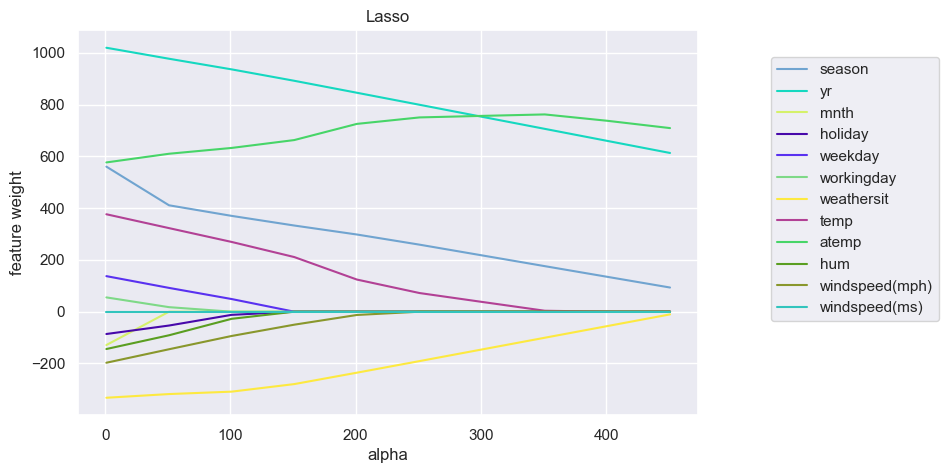

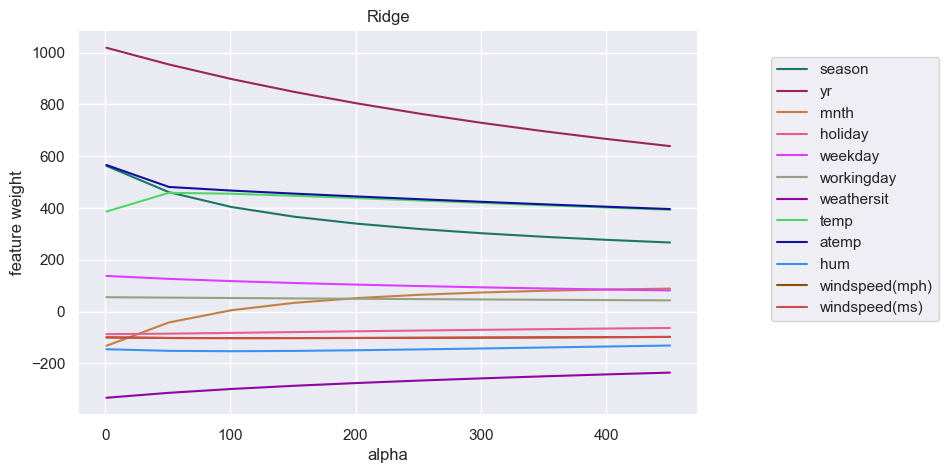

In [21]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

## Відповіді:
    1. Регуляризатор Lasso агресивніше зменшує ваги при тому самому alpha.
    2. При збільшенні параметра alpha ваги у методі Lasso зменшуються, оскільки більше менш значущих даних стають ближче до нуля.
    3. Утвердження про Lasso вірно, а для Ridge це не відбудеться.
    4. Lasso регуляризатор ефективний для видалення неінформативних ознак. Він має здатність зменшувати коефіцієнти деяких ознак до нуля, тим самим виключаючи ці ознаки з моделі і роблячи відбір факторів для передбачення більш ефективним.



# Завдання 8

In [30]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    data_list = list(data)

    x = [e[0] for e in data_list]
    y = [e[1] for e in data_list]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

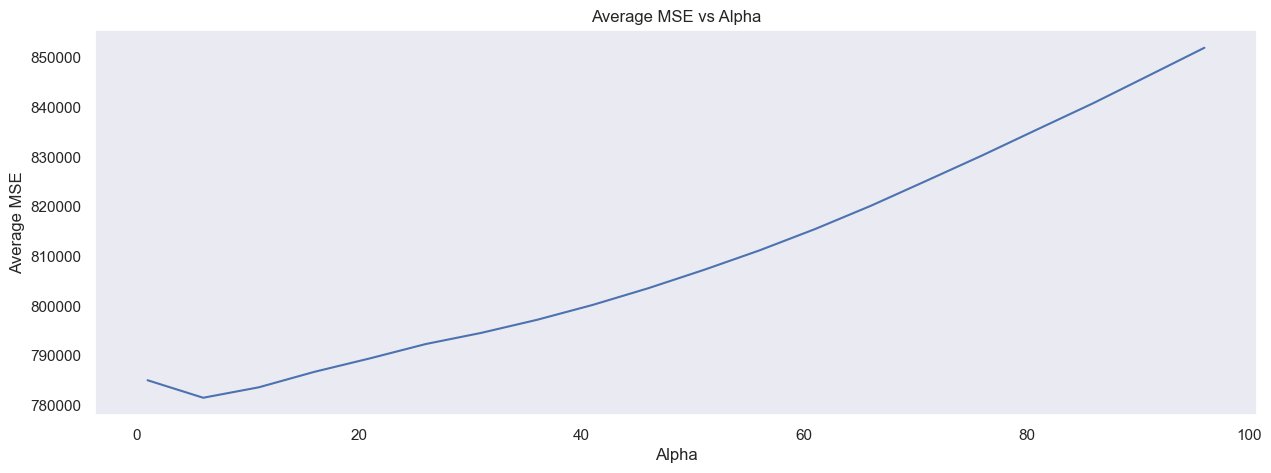

Alpha = 6
('season', 532.0189828413535)
('yr', 1015.0602226430597)
('mnth', -100.03952614356628)
('holiday', -83.2939598752991)
('weekday', 132.50446549095793)
('workingday', 51.55708561407379)
('weathersit', -330.5598567399813)
('temp', 370.6798550300328)
('atemp', 581.3969310654992)
('hum', -140.00740550068875)
('windspeed(mph)', -191.7714084713494)
('windspeed(ms)', -2.685570636704926e-08)


In [33]:
alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

mse_avg = np.mean(regressor.mse_path_, axis=1)

best_alpha = regressor.alpha_
coef_pairs = list(zip(df.columns[:-1], regressor.coef_))

create_plot(list(zip(regressor.alphas_, mse_avg)), 'Average MSE vs Alpha', 'Alpha', 'Average MSE')
print("Alpha =", best_alpha)
for pair in coef_pairs:
    print(pair)

# Завдання 9

Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052246
Alpha = 1, MSE = 799433.1673691688
Alpha = 51, MSE = 796979.8955193643


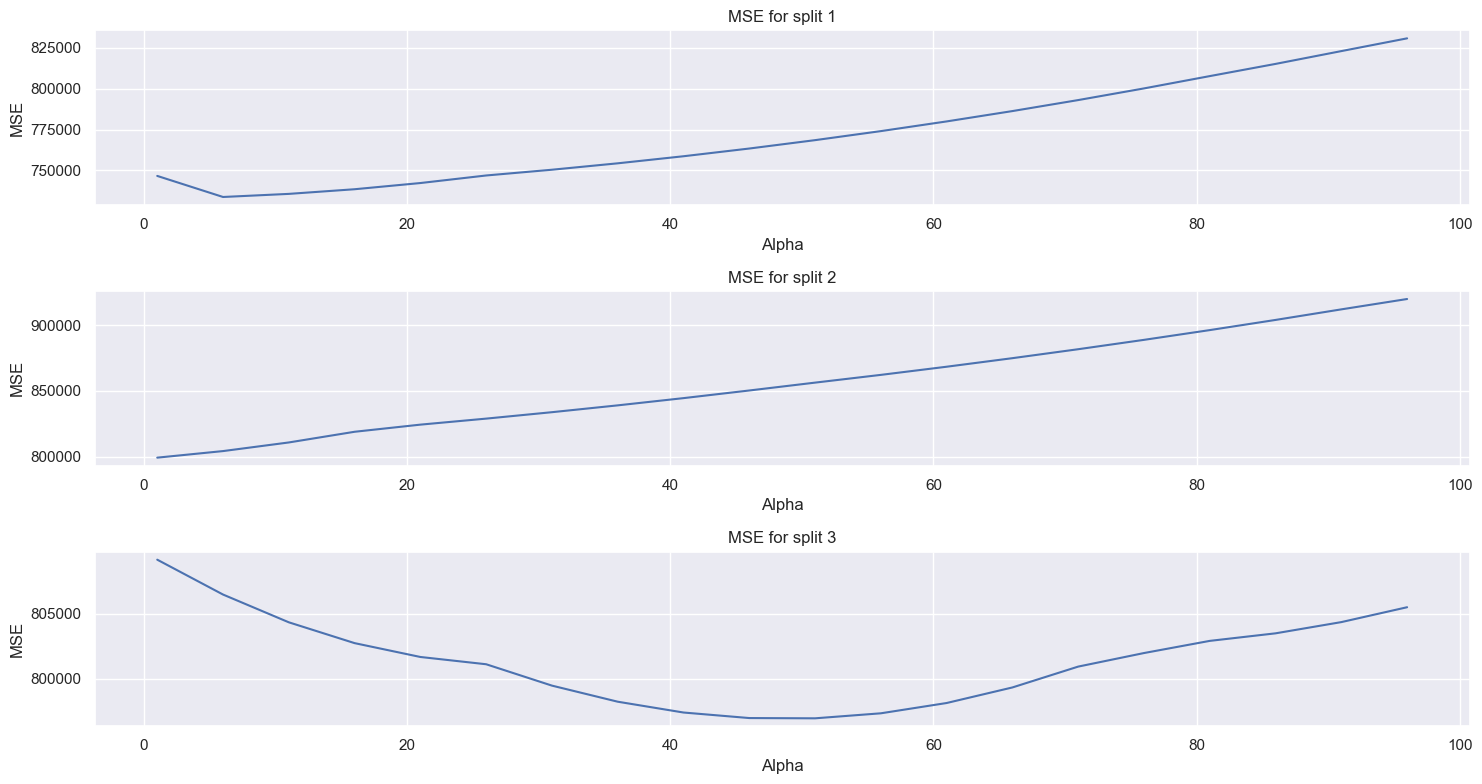

In [41]:
min_mse_indices = np.argmin(regressor.mse_path_, axis=0)

alphas_for_min_mse = regressor.alphas_[min_mse_indices]

print("Alphas with minimum MSE:")
for i, alpha in enumerate(alphas_for_min_mse):
    print(f"Alpha = {alpha}, MSE = {regressor.mse_path_[min_mse_indices[i], i]}")

fig, axs = plt.subplots(3, 1, figsize=(15, 8))

for i, ax in enumerate(axs.flatten()):
    ax.plot(regressor.alphas_, regressor.mse_path_[:, i])
    ax.set_title(f"MSE for split {i + 1}")
    ax.set_xlabel("Alpha")
    ax.set_ylabel("MSE")

plt.tight_layout()
plt.show()

# Завдання 10

## Відповідь:
    1. Зростаюча ленійна регресія  видна на гравіках (yr, workingday, temp). Чим вище значення, тим сприятливіші умови для оренди велосипеда, тому буде більше бажаючих.
    2. Спадаючу ленійну регресію можна побачити по ознакам повязаних з погодними умовами(weathersit, hum, windspeed). Чим вище значення, тим гірші умови для їзди на велосипеді, що може призвести до зменьшення кількості оренд велосипедів.
    3.Коефіцієнт windspeed(mph) та windspeed(ms) рівний нулю, оскільки вони мають однаковий вплив на cnt, тому модель виключила одну з цих них.